In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
# Read the input image
image = cv2.imread('/content/drive/MyDrive/VisionForge/Assignments + Mini Projects/Assignment-3/coins.jpg')

In [ ]:
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
# Apply GaussianBlur to reduce noise and help circle detection
blurred = cv2.GaussianBlur(gray, (15, 15), 0)

In [ ]:
# Use HoughCircles to detect circles in the image
circles = cv2.HoughCircles(
    blurred,
    cv2.HOUGH_GRADIENT,
    dp=1,
    minDist=50,
    param1=50,
    param2=30,
    minRadius=10,
    maxRadius=100
)

In [ ]:
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(image, (x, y), r, (0, 255, 0), 4)

    #Draw filled circles (change color to red) for further processing
    for (x, y, r) in circles:
        cv2.circle(image, (x, y), r, (0, 0, 255), -1)

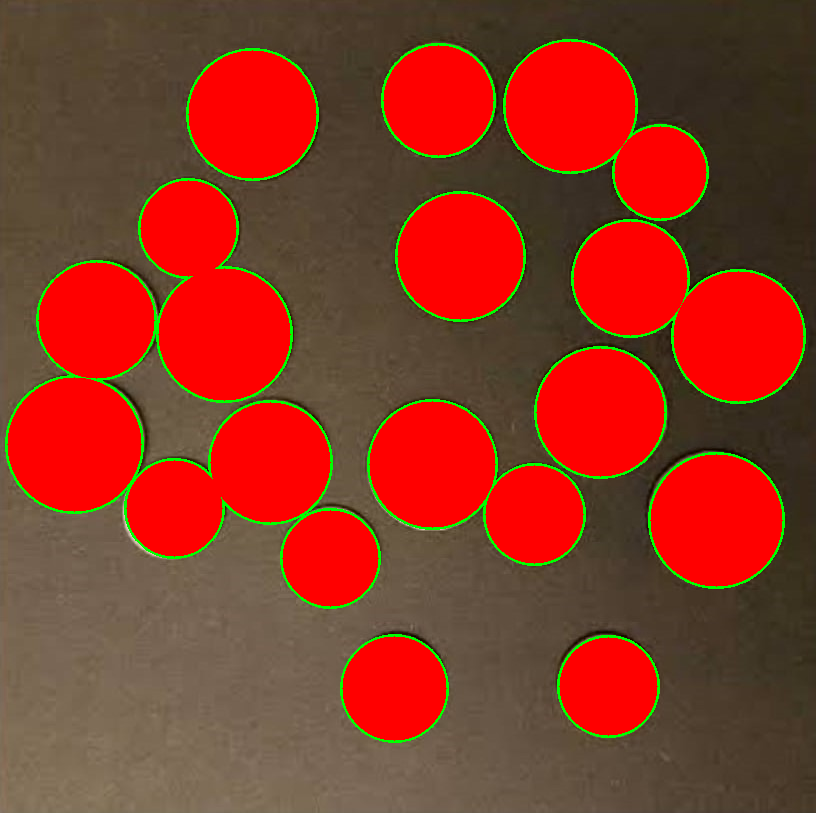

In [ ]:
# Detected the coins
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Read the input image
image2 = cv2.imread('/content/drive/MyDrive/VisionForge/Assignments + Mini Projects/Assignment-3/island.png')

# Convert the image from BGR to RGB (OpenCV uses BGR by default)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

In [ ]:
# Reshape the image to a 2D array of pixels
pixels = image2_rgb.reshape((-1, 3))

In [ ]:
# Convert to float32 for k-means clustering
pixels = np.float32(pixels)

# Define the criteria (stopping condition) for k-means algorithm
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [ ]:
# Set the number of clusters (k) for k-means
k = 3

In [ ]:
# Apply k-means clustering
_, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the centers back to 8-bit values
centers = np.uint8(centers)

In [ ]:
# Map the labels to their respective centers
segmented_image2 = centers[labels.flatten()]

# Reshape the segmented image back to the original dimensions
segmented_image2 = segmented_image2.reshape(image2_rgb.shape)

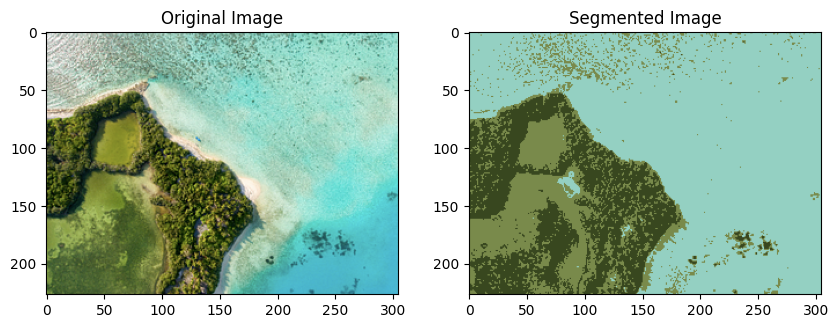

In [ ]:
# Display the original and segmented images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image2_rgb)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image2)
plt.title('Segmented Image')

plt.show()


In [ ]:
# Read the input image
image2 = cv2.imread('/content/drive/MyDrive/VisionForge/Assignments + Mini Projects/Assignment-3/island.png')

# Convert the image from BGR to RGB (OpenCV uses BGR by default)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

In [ ]:
# Reshape the image to a 2D array of pixels
pixels = image2_rgb.reshape((-1, 3))

In [ ]:
# Convert to float32 for k-means clustering
pixels = np.float32(pixels)

# Define the criteria (stopping condition) for k-means algorithm
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [ ]:
# Set the number of clusters (k) for k-means
k = 5

In [ ]:
# Apply k-means clustering
_, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the centers back to 8-bit values
centers = np.uint8(centers)

In [ ]:
# Map the labels to their respective centers
segmented_image2 = centers[labels.flatten()]

# Reshape the segmented image back to the original dimensions
segmented_image2 = segmented_image2.reshape(image2_rgb.shape)

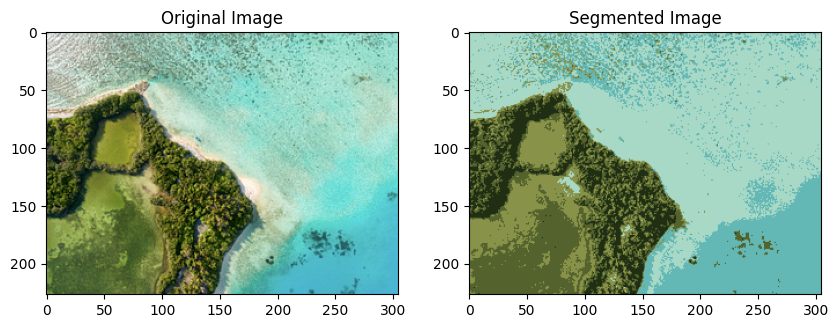

In [ ]:
# Display the original and segmented images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image2_rgb)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image2)
plt.title('Segmented Image')

plt.show()
